In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
############################
# generate data
############################
data_size = 100
_x = np.random.uniform(size=(data_size,1),low=0,high=10)
_y = _x + np.random.normal(size=(data_size,1))

split_rate = 0.7
split_size = int(data_size*split_rate)
train_x_dataset = _x[:split_size]
train_y_dataset = _y[:split_size]
test_x_dataset = _x[split_size:]
test_y_dataset = _y[split_size:]

In [3]:
#############################
# construct the model
#############################
lr = 0.05
tf.reset_default_graph()
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
w = tf.Variable(tf.zeros([1,1]))
b = tf.Variable(tf.zeros([1,1]))
y_hat = tf.matmul(x,w) + b

cost = tf.reduce_mean(tf.square(y-y_hat))
grad = tf.train.AdamOptimizer(lr).minimize(cost)

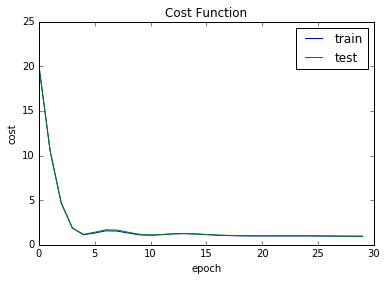

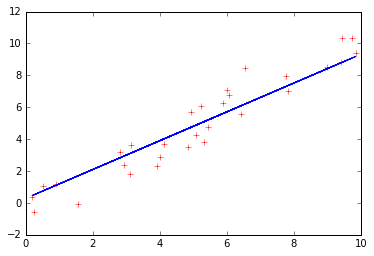

In [6]:
#############################
# train & test the model
#############################
epoch = 30
batch_size = 20
init = tf.global_variables_initializer()
train_cost = []
test_cost = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):
        for j in range(int(np.ceil(len(train_x_dataset)/float(batch_size)))):
            g = sess.run(grad,{x:train_x_dataset[j:j+batch_size],y:train_y_dataset[j:j+batch_size]})
        train_cost.append(sess.run(cost,{x:train_x_dataset,y:train_y_dataset}))
        test_cost.append(sess.run(cost,{x:test_x_dataset,y:test_y_dataset}))
    y_predicted = test_x_dataset * w.eval(sess) + b.eval(sess)
              
    ##### plot the model #####
    plt.plot(train_cost,label='train')
    plt.plot(test_cost,label='test')
    plt.title('Cost Function')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    plt.plot(test_x_dataset,test_y_dataset,'r+')
    plt.plot(test_x_dataset,y_predicted)
    plt.show()